In [3]:
# Load libraries
# Import libraries

import array
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import RMSprop, SGD

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#label columns and load data
col_names = ['children','income', 'numHandsets','handsetAge','smartPhone',
             'currentHandsetPrice','creditRating','homeOwner','creditCard','avgBill','avgMins','avgRecurringCharge',
            'avgOverBundleMins','avgRoamCalls','callMinutesChangePct','billAmountChangePct','avgReceivedMins',
            'avgOutCalls','avgInCalls','peakOffPeakRatio','peakOffPeakRatioChangePct','avgDroppedCalls','lifeTime',
            'lastMonthCustomerCareCalls','numRetentionCalls','numRetentionOffersAccepted','newFrequentNumbers','churn',
             'dummy1','dummy2','dummy3','dummy4']

churn = pd.read_csv("ACMETelephoneABT_cleaned.csv")
churn.columns=col_names

numclasses = churn.columns.size - 4
print(numclasses)

28


In [5]:
#create label encoder for columns of type string

#label encoder for true/false categories (true=1 ; false=0)
le1 = preprocessing.LabelEncoder()
le1.fit(churn.children)
list(le1.classes_)
churn.children = le1.transform(churn.children)
churn.smartPhone = le1.transform(churn.smartPhone)
churn.homeOwner = le1.transform(churn.homeOwner)
churn.creditCard = le1.transform(churn.creditCard)
churn.churn = le1.transform(churn.churn)

#label encoder for Credit Rating A-G
le2 = preprocessing.LabelEncoder()
le2.fit(churn.creditRating)
list(le2.classes_)
churn.creditRating = le2.transform(churn.creditRating)


LabelEncoder()

[' false', ' true']

LabelEncoder()

[' A', ' B', ' C', ' D', ' E', ' F', ' G']

In [6]:
#Normalize Data between 0 and 1

churn.income = churn.income/max(churn.income)
churn.numHandsets = churn.numHandsets/max(churn.numHandsets)
churn.handsetAge = churn.handsetAge/max(churn.handsetAge)
churn.currentHandsetPrice = churn.currentHandsetPrice/max(churn.currentHandsetPrice)
churn.creditRating = churn.creditRating/max(churn.creditRating)
churn.avgBill = churn.avgBill/max(churn.avgBill)
churn.avgMins = churn.avgMins/max(churn.avgMins)
churn.avgRecurringCharge = churn.avgRecurringCharge/max(churn.avgRecurringCharge)
churn.avgOverBundleMins = churn.avgOverBundleMins/max(churn.avgOverBundleMins)
churn.avgRoamCalls = churn.avgRoamCalls/max(churn.avgRoamCalls)
churn.callMinutesChangePct = churn.callMinutesChangePct/max(churn.callMinutesChangePct)
churn.billAmountChangePct = churn.billAmountChangePct/max(churn.billAmountChangePct)
churn.avgReceivedMins = churn.avgReceivedMins/max(churn.avgReceivedMins)
churn.avgOutCalls = churn.avgOutCalls/max(churn.avgOutCalls)
churn.avgInCalls = churn.avgInCalls/max(churn.avgInCalls)
churn.peakOffPeakRatio = churn.peakOffPeakRatio/max(churn.peakOffPeakRatio)
churn.peakOffPeakRatioChangePct = churn.peakOffPeakRatioChangePct/max(churn.peakOffPeakRatioChangePct)
churn.avgDroppedCalls = churn.avgDroppedCalls/max(churn.avgDroppedCalls)
churn.lifeTime = churn.lifeTime/max(churn.lifeTime)
churn.lastMonthCustomerCareCalls = churn.lastMonthCustomerCareCalls/max(churn.lastMonthCustomerCareCalls)
churn.numRetentionCalls = churn.numRetentionCalls/max(churn.numRetentionCalls)
churn.numRetentionOffersAccepted = churn.numRetentionOffersAccepted/max(churn.numRetentionOffersAccepted)
churn.newFrequentNumbers = churn.newFrequentNumbers/max(churn.newFrequentNumbers)

In [7]:
#split data into feature/target variables & train/test set

feature_cols = ['children','income', 'numHandsets','handsetAge','smartPhone',
             'currentHandsetPrice','creditRating','homeOwner','creditCard','avgBill','avgMins','avgRecurringCharge',
            'avgOverBundleMins','avgRoamCalls','callMinutesChangePct','billAmountChangePct','avgReceivedMins',
            'avgOutCalls','avgInCalls','peakOffPeakRatio','peakOffPeakRatioChangePct','avgDroppedCalls','lifeTime',
            'lastMonthCustomerCareCalls','numRetentionCalls','numRetentionOffersAccepted','newFrequentNumbers']
X = churn[feature_cols] # Features
y = churn.churn # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 70% training and 30% test

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)


(7990, 27) (7990,) (1998, 27) (1998,)


Accuracy (DT) : 0.5970970970970971
[[498 515]
 [290 695]]


True

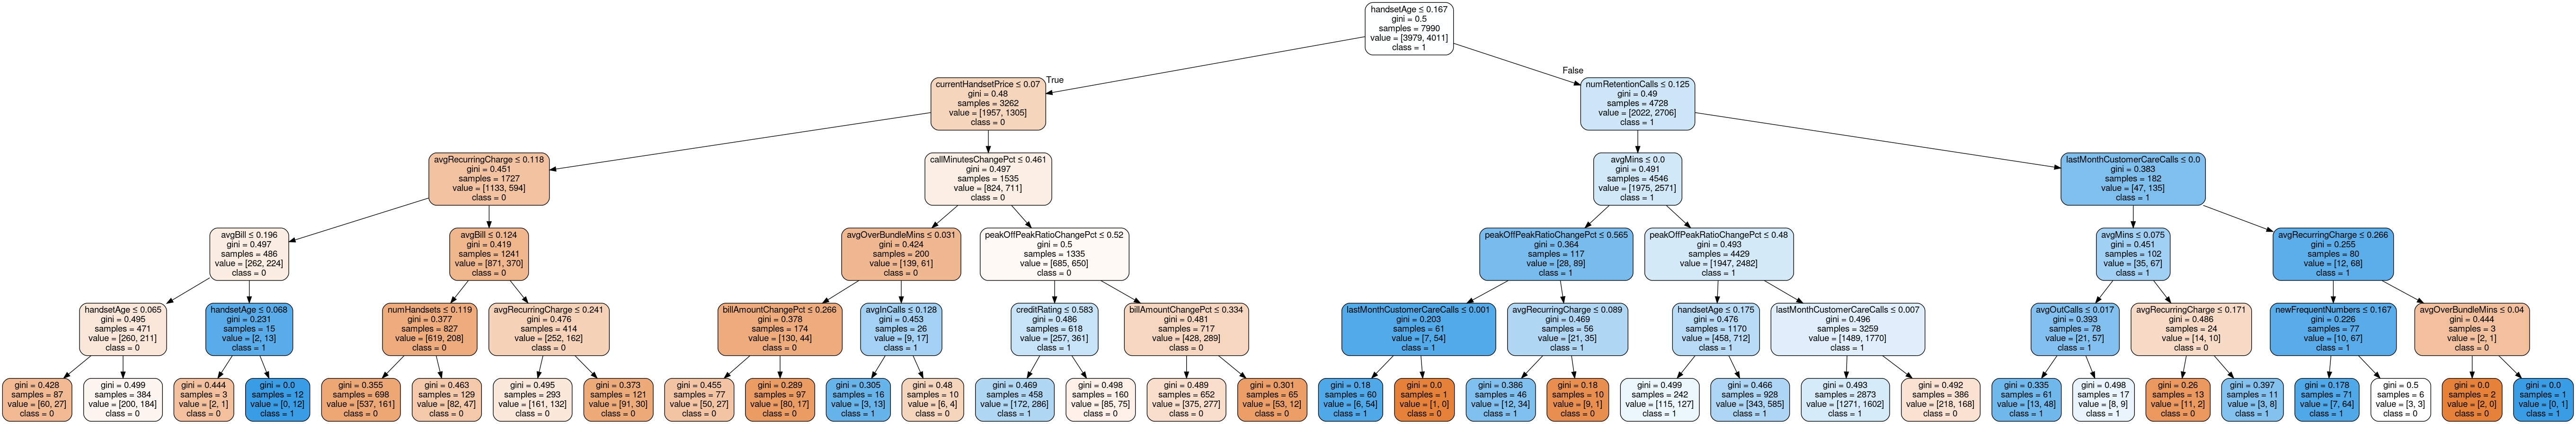

In [20]:
# Create Decision Tree classifer object & Train
clf = DecisionTreeClassifier(criterion="gini", max_depth=5)
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy (DT) :",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1',])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DT_Churn.png')
Image(graph.create_png())

In [9]:
### k-Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier

#loops over entire range of k-values from 1 to 30 to choose best value
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)# Create KNN classifier

    knn.fit(X_train,y_train)
   
    score = knn.score(X_test, y_test) #check accuracy of our model on the test data

    knn_pred = knn.predict(X_test)

    print(i)
    print("Accuracy (kNN) :",metrics.accuracy_score(y_test, knn_pred))

from sklearn.model_selection import cross_val_score

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=7 )

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:',format(np.mean(cv_scores)))
print(y_test.shape)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

1
Accuracy (kNN) : 0.53003003003003


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

2
Accuracy (kNN) : 0.5245245245245245


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

3
Accuracy (kNN) : 0.535035035035035


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

4
Accuracy (kNN) : 0.5405405405405406


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

5
Accuracy (kNN) : 0.539039039039039


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

6
Accuracy (kNN) : 0.5435435435435435


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

7
Accuracy (kNN) : 0.5365365365365365


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

8
Accuracy (kNN) : 0.5495495495495496


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

9
Accuracy (kNN) : 0.535035035035035


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

10
Accuracy (kNN) : 0.54004004004004


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

11
Accuracy (kNN) : 0.5420420420420421


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

12
Accuracy (kNN) : 0.541041041041041


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

13
Accuracy (kNN) : 0.5370370370370371


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

14
Accuracy (kNN) : 0.54004004004004


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

15
Accuracy (kNN) : 0.545045045045045


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

16
Accuracy (kNN) : 0.545045045045045


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

17
Accuracy (kNN) : 0.5515515515515516


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

18
Accuracy (kNN) : 0.546046046046046


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

19
Accuracy (kNN) : 0.549049049049049


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

20
Accuracy (kNN) : 0.5495495495495496


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

21
Accuracy (kNN) : 0.5495495495495496


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')

22
Accuracy (kNN) : 0.5520520520520521


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

23
Accuracy (kNN) : 0.5555555555555556


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

24
Accuracy (kNN) : 0.5475475475475475


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

25
Accuracy (kNN) : 0.5530530530530531


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=26, p=2,
                     weights='uniform')

26
Accuracy (kNN) : 0.5540540540540541


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')

27
Accuracy (kNN) : 0.5605605605605606


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=28, p=2,
                     weights='uniform')

28
Accuracy (kNN) : 0.5580580580580581


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')

29
Accuracy (kNN) : 0.5620620620620621
[0.54177089 0.49249249 0.48823235 0.53129695 0.53630446]
cv_scores mean: 0.5180194257122306
(1998,)


In [22]:
print(y_train.shape,X_train.shape)
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Dropout(0.1,input_shape=(27,)))
model.add(Dense(150,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(150,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy',optimizer=SGD(lr=0.001,decay=1e-6,momentum=0.4),metrics=['accuracy'])

batch_size = 15
epochs = 30

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                    verbose=2,
                    validation_data=(X_test, y_test))



(7990,) (7990, 27)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_3 (Dropout)          (None, 27)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)               4200      
_________________________________________________________________
dropout_4 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 150)               22650     
_________________________________________________________________
dropout_5 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1510      
Total params: 28,360
Trainable params: 28,360
Non-trainable params: 0
_______________________________

Text(0.5, 1.0, 'Accuracy vs Epoch (Final)')

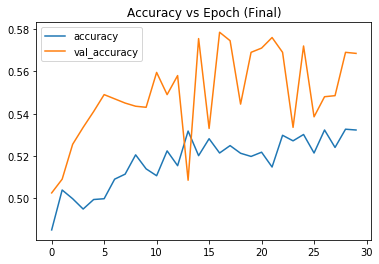

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy vs Epoch (Final)')

In [21]:
#Extra Credit Section
# Create Decision Tree classifer object & Train
clf = DecisionTreeClassifier(criterion= "entropy", max_depth=4)
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy (DT) :",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy (DT) : 0.5925925925925926
[[424 589]
 [225 760]]
